# 迴歸分析

> 以下均為「董洪偉(2022)。打下最紮實AI基礎不依賴套件：手刻機器學習神經網路穩健前進。深智數位出版」一書之練習與筆記

> 僅使用基礎套件 numpy 與 pandas

In [35]:
import pandas as pd

# 餐車利潤資料集
file_path = "/content/drive/MyDrive/Colab Notebooks/Machine-Learning/Data/food_truck_data.csv"  # 請依實際路徑調整
df = pd.read_csv(file_path)

# 查看資料的基本資訊（欄位型態、缺失值等）
df.info()

# 查看各數值欄位的基本統計量
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


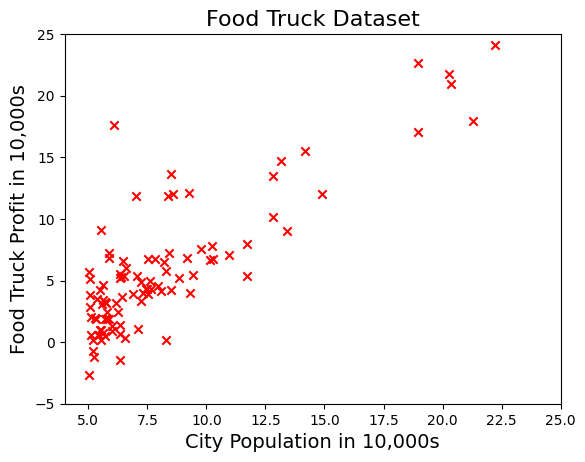

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

x = df["Population"]
y = df["Profit"]

fig, ax = plt.subplots()
ax.scatter(x, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
plt.show()

## 最小平方法

這段程式碼實作的是矩陣形式的最小平方法（Ordinary Least Squares），其數學公式如下：

$W​=(X^TX)^{−1}X^Ty$

In [37]:
import numpy as np

# 從 DataFrame 中提取數值資料
data = df.values
# 取得第一欄數據：城市人口 (自變數)，形狀為 m*1
train_x = data[:, 0]
# 取得第二欄數據：餐車利潤 (應變數)，形狀為 m*1
train_y = data[:, 1]

# --- 建立特徵矩陣 X ---
# 建立一個全為 1 的矩陣，長度與 train_x 相同，寬度為 2
# 第一欄全為 1 是為了代表截距項 (Intercept/Bias)
X = np.ones(shape=(len(train_x), 2))
# 將原始的人口數據填入第二欄
X[:, 1] = train_x
# 目標向量 y
y = train_y

# --- 計算本文方程式 (Normal Equation) ---
# 計算公式為：w = (X^T * X)^-1 * X^T * y

# 1. 計算 X 的轉置矩陣 (X Transpose)
XT = X.transpose()

# 2. 計算 X 轉置與 y 的矩陣乘法 (XT * y)
XTy = XT @ y

# 3. 核心計算：使用 np.linalg.inv 求矩陣的反矩陣
# 計算 (XT @ X) 的反矩陣後，再乘以 XTy，得到權重向量 w
# w[0] 為截距 (Intercept)，w[1] 為斜率 (Slope)
W = np.linalg.inv(XT @ X) @ XTy

# 輸出計算出的權重 [截距, 斜率]
print(W)

# --- 進行預測 ---
# 利用得到的模型進行預測：y = w[1]*x + w[0]
# 這裡預測當人口為 4.6 (萬人) 時，預計的餐車利潤
prediction = 4.6 * W[1] + W[0]
print(prediction)

[-3.89578088  1.19303364]
1.592173884960257


## 梯度下降法

以下則是示例使用梯度下降法來推算參數值，截距項（Intercept, b）與迴歸係數（Regression Coefficients, w）。

In [38]:
X = train_x
w,b = 0.,0.
dw = np.mean((w*X+b-y)*X)
db = np.mean((w*X+b-y))
print(dw)
print(db)

-65.32884974555671
-5.839135051546393


In [39]:
def gradient_descent(x, y, w, b, alpha=0.01, iterations=100, epsilon=1e-9):
    history = []  # 用於紀錄每一代更新後的 [w, b]，供後續繪圖使用

    for i in range(iterations):
        # --- 計算梯度 (偏微分) ---
        # dw 是損失函數對 w 的斜率：dJ/dw
        # 公式：mean((預測值 - 真實值) * x)
        dw = np.mean((w * x + b - y) * x)

        # db 是損失函數對 b 的斜率：dJ/db
        # 公式：mean(預測值 - 真實值)
        db = np.mean((w * x + b - y))

        # --- 提前停止準則 ---
        # 如果 dw 和 db 的變動量都小於極小值 epsilon，代表已接近最低點
        if abs(dw) < epsilon and abs(db) < epsilon:
            print(f"迭代完成，梯度已經夠小，在第 {i} 次完成")
            break

        # --- 更新參數 (最關鍵的一步) ---
        # w_new = w_old - 學習率 * 梯度
        # 往梯度的反方向走，才能到達損失函數的最低點
        w -= alpha * dw
        b -= alpha * db

        # 紀錄本次迭代後的參數
        history.append([w, b])

    return history

In [40]:
alpha = 0.02
iterations=100000
history = gradient_descent(X,y,w,b,alpha,iterations)
print(len(history))
print(history[-1])

迭代完成，梯度已經夠小，在第 5646 次完成
5646
[np.float64(1.1930336436331894), np.float64(-3.895780872773335)]


In [41]:
def draw_line(plt,w,b,x,linewidth =2):
    m=len(x)
    f = [0]*m
    for i in range(m):
       f[i] = b+w*x[i]
    plt.plot(x, f, linewidth)

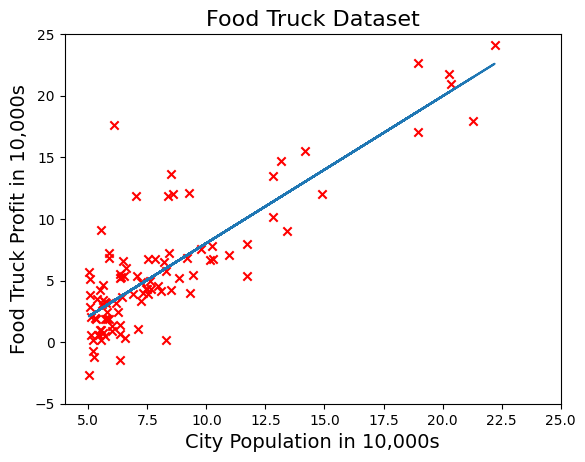

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

#fig, ax = plt.subplots()
plt.scatter(X, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
w,b = history[-1]
draw_line(plt,w,b,X,6)
# draw_line(plt,W[1],W[0],X,3)
plt.show()

以下程式碼定義了損失函數 (Loss Function)，具體來說是均方誤差 (Mean Squared Error, MSE)的變體。

它的目的是衡量當前模型參數 $(w, b)$ 下，預測值與真實值之間的差距。

這段函數裡包含了兩種實作方式：一種是 NumPy 向量化運算（極快），另一種是 for 迴圈運算（較慢且不會被執行到）。可以分別註解執行來看結果。

In [43]:
def loss(x, y, w, b):
    m = len(y) # 取得樣本總數

    # --- 方式 A：向量化運算 (Vectorized Implementation) ---
    # 這行會直接計算並回傳結果。這也是推薦的實作方式。
    # (x*w + b) 是預測值，減去 y 後平方，再取平均並除以 2。
    return np.mean((x * w + b - y)**2) / 2

    # --- 以下程式碼不會被執行到 (因為上方已有 return) ---

    # --- 方式 B：迴圈運算 (Iterative Implementation) ---
    cost = 0
    for i in range(m):
        f = x[i] * w + b        # 第 i 筆資料的預測值
        cost += (f - y[i])**2   # 累加殘差平方和

    cost /= (2 * m)             # 除以 2m (這是為了後續微積分求導方便，常係數不影響極值位置)
    return cost

# 測試：當 w=1, b=-3 時的損失值
print(loss(X, y, 1, -3))

4.983860697569072


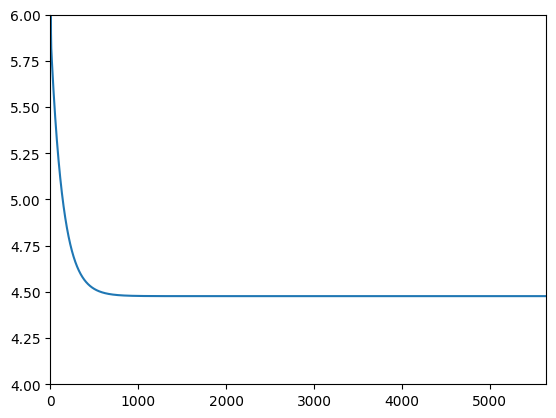

In [44]:
costs = [loss(X,y,w,b) for w,b in history]
plt.axis([0, len(costs), 4, 6])
plt.plot(costs)
plt.show()

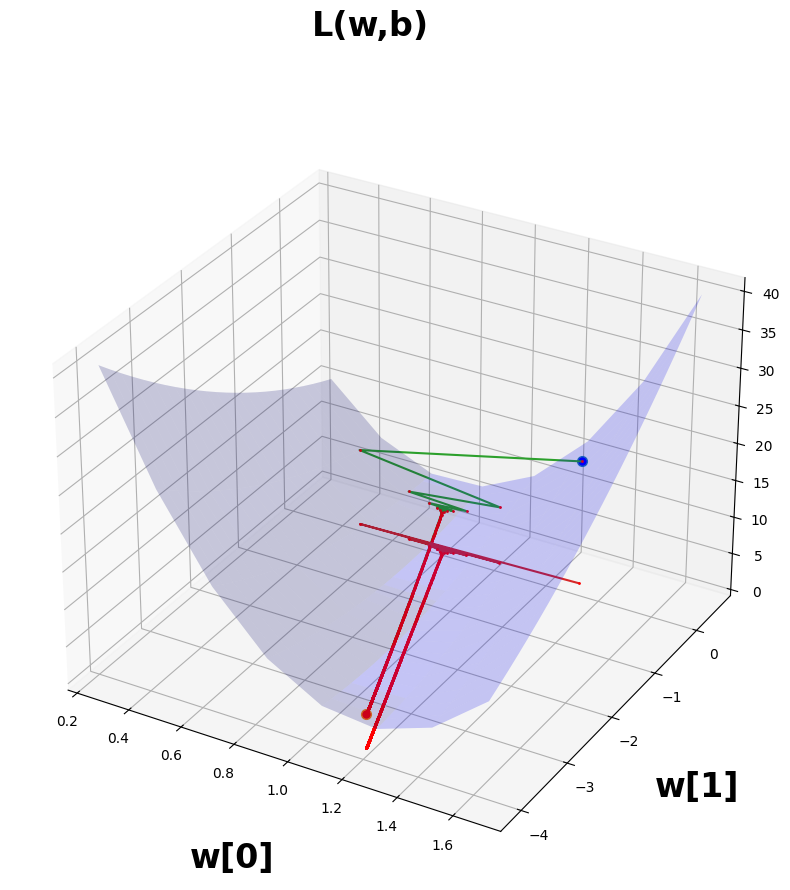

In [45]:
from mpl_toolkits.mplot3d import Axes3D

def plot_history(x, y, history, figsize=(20, 10)):
    # 從訓練歷史紀錄 history 中提取權重 w 和 截距 b 的演變過程
    w = [e[0] for e in history]
    b = [e[1] for e in history]

    # --- 準備 3D 曲面數據 ---
    # 根據 w 和 b 的範圍設定座標軸邊界，並建立網格點 (Meshgrid)
    xmin, xmax, xstep = min(w)-0.2, max(w)+0.2, .2
    ymin, ymax, ystep = min(b)-0.2, max(b)+0.2, .2
    ws, bs = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                         np.arange(ymin, ymax + ystep, ystep))

    # 計算網格中每一個 (w, b) 組合對應的損失值 (Loss)
    zs = np.array([loss(x, y, w, b) for w, b in zip(np.ravel(ws), np.ravel(bs))])
    z = zs.reshape(ws.shape) # 將損失值轉回與網格相同的形狀

    # --- 建立 3D 圖表 ---
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # 設定座標軸標籤
    ax.set_xlabel('w[0]', labelpad=30, fontsize=24, fontweight='bold')
    ax.set_ylabel('w[1]', labelpad=30, fontsize=24, fontweight='bold')
    ax.set_zlabel('L(w,b)', labelpad=30, fontsize=24, fontweight='bold')

    # 繪製半透明的藍色損失曲面 (Surface Plot)
    ax.plot_surface(ws, bs, z, rstride=1, cstride=1, color='b', alpha=0.2)

    # --- 繪製優化路徑 ---
    # 標記起點 (藍色圓點) 與 終點 (紅色圓點)
    w_sart, b_start, w_end, b_end = history[0][0], history[0][1], history[-1][0], history[-1][1]
    ax.plot([w_sart], [b_start], [loss(x,y,w_sart,b_start)], markerfacecolor='b', marker='o', markersize=7)
    ax.plot([w_end], [b_end], [loss(x,y,w_end,b_end)], markerfacecolor='r', marker='o', markersize=7)

    # 繪製曲面上的梯度下降路徑 (紅色點線)
    z2 = [loss(x,y,w,b) for w,b in history]
    ax.plot(w, b, z2, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

    # 在底部 (z=0) 投影移動路徑，方便觀察參數在平面的位移
    ax.plot(w, b, 0, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

    fig.suptitle("L(w,b)", fontsize=24, fontweight='bold')
    return ws, bs, z

# 執行繪圖
ws, bs, z = plot_history(X, y, history)

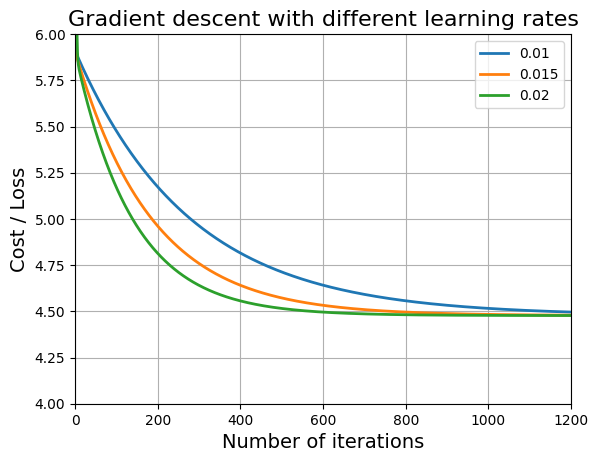

In [46]:
plt.figure() # 建立一個新的繪圖視窗
num_iters = 1200 # 設定總迭代次數（訓練輪數）
learning_rates = [0.01, 0.015, 0.02] # 定義要測試的學習率清單

for lr in learning_rates:
    w, b = 0, 0  # 每一輪測試前，都要將權重(w)與截距(b)初始化為 0

    # 執行梯度下降法，取得參數更新的歷史紀錄
    history = gradient_descent(X, y, w, b, lr, num_iters)

    # 計算每一次迭代後的損失值 (Cost)，用來觀察收斂趨勢
    cost_history = [loss(X, y, w, b) for w, b in history]

    # 繪製該學習率下的收斂曲線
    plt.plot(cost_history, linewidth=2)

# 圖表格式設定
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Cost / Loss", fontsize=14)
plt.legend(list(map(str, learning_rates))) # 顯示不同顏色對應的學習率

# 設定座標軸範圍，方便觀察損失值從 4 到 6 之間的細微變化
plt.axis([0, num_iters, 4, 6])
plt.grid() # 加上網格輔助觀察
plt.show() # 顯示圖表

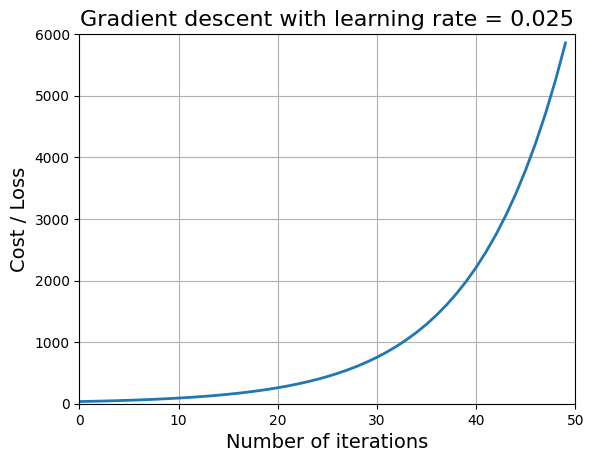

In [47]:
learning_rate = 0.025  # 設定一個較大的學習率
num_iters = 50         # 迭代次數設定為 50 次
w, b = 0., 0.          # 初始化參數為浮點數 0

# 執行梯度下降
history = gradient_descent(X, y, w, b, learning_rate, num_iters)

# 計算每次迭代後的損失值
cost_history = [loss(X, y, w, b) for w, b in history]

# 繪製圖表
plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with learning rate = " + str(learning_rate), fontsize=16)
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("Cost / Loss", fontsize=14)

# 注意這裡：Y 軸範圍設得非常大 (0 到 6000)
# 這通常是因為學習率太大，導致損失值噴掉 (爆炸)
plt.axis([0, num_iters, 0, 6000])
plt.grid()
plt.show()

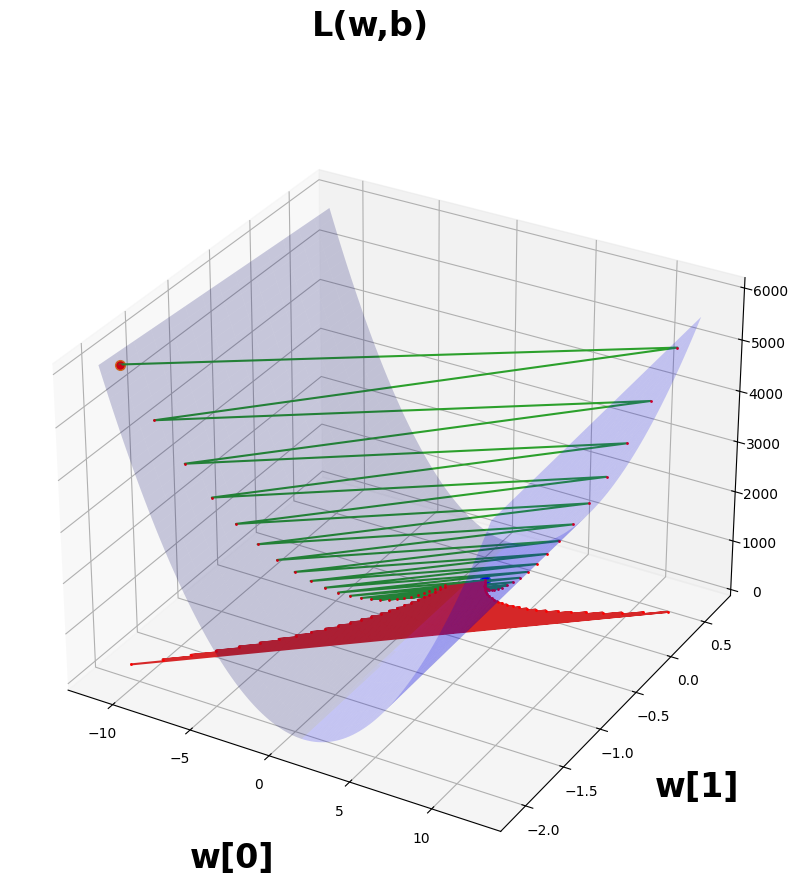

In [48]:
s,bs,z = plot_history(X,y,history)

## 梯度驗證

前面提到過，在正式執行梯度下降法 (Gradient Descent) 之前，應該先進行梯度驗證，以確保梯度（Gradient）與損失函數值（Loss value）的運算邏輯完全正確。針對線性回歸問題，我們會利用下方的數值梯度 (Numerical Gradient) 公式，來檢驗程式碼中的解析梯度（Analytical Gradient）推導是否有誤：

$$\frac{\partial{L(w,b)}}{\partial{w}}=\lim_{\epsilon\to 0}  \frac{L(w+\epsilon,b)-L(w-\epsilon,b)}{2\epsilon}$$$$\frac{\partial{L(w,b)}}{\partial{b}}=\lim_{\epsilon\to 0}  \frac{L(w,b+\epsilon)-L(w,b-\epsilon)}{2\epsilon} $$

針對前述的梯度下降實作，我們可以用下方程式碼來比對「解析梯度」與「數值梯度」是否一致。先前的 loss() 函式是用來計算 $L(w,b)$ 的，而下方的兩行程式碼則是我們根據微積分推導出來的解析梯度：

In [49]:
# 這是解析梯度 (根據公式推導出的精確解)
dw = np.mean((w*x + b - y) * x)
db = np.mean((w*x + b - y))

In [50]:
# 定義一個匿名函數 (Lambda)，用於計算數值梯度
# 輸入：x, y (資料), w, b (當前參數), eps (極小的位移量)
df_approx = lambda x, y, w, b, eps: (
    # 1. 對 w 求偏導數的近似值: [L(w+eps) - L(w-eps)] / (2*eps)
    (loss(x, y, w + eps, b) - loss(x, y, w - eps, b)) / (2 * eps),

    # 2. 對 b 求偏導數的近似值: [L(b+eps) - L(b-eps)] / (2*eps)
    (loss(x, y, w, b + eps) - loss(x, y, w, b - eps)) / (2 * eps)
)

In [51]:
w =1.0
b = -2.
eps = 1e-8
dw = np.mean((w*X+b-y)*X)
db = np.mean((w*X+b-y))
grad = np.array([dw,db])
grad_approx = df_approx(X,y,w,b,eps)
print(grad)
print(grad_approx)
print(abs(grad-grad_approx))

[-0.24450692  0.32066495]
(np.float64(-0.24450690361277339), np.float64(0.3206649612508272))
[1.98820717e-08 1.27972190e-08]


## 預測

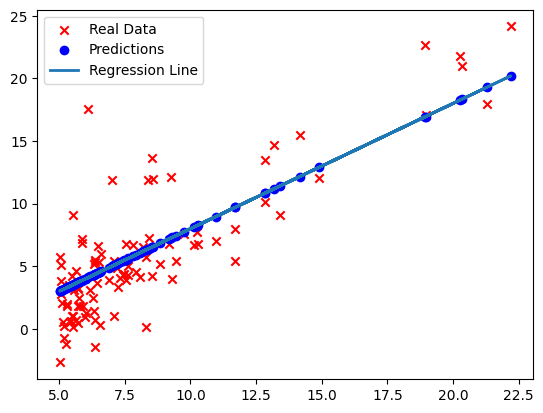

In [52]:
# --- 計算預測值 ---
m = len(X)             # 取得樣本總數
predictions = [0] * m  # 初始化一個長度為 m 的清單，用來存放預測結果

for i in range(m):
    # 根據線性公式 y = x*w + b 計算每個樣本的預測值
    # 注意：這裡假設 X 是原始的 1D 特徵數據
    predictions[i] = X[i] * w + b

# --- 繪圖視覺化 ---
# 繪製真實數據點：紅色 "x" 符號
plt.scatter(X, y, marker="x", c="red", label="Real Data")

# 繪製模型預測點：藍色 "o" 符號
plt.scatter(X, predictions, marker="o", c="blue", label="Predictions")

# 若取消下方註解，則會繪製出一條連續的藍色回歸線，這通常更直觀
plt.plot(X, predictions, linewidth=2, label="Regression Line")

plt.legend() # 顯示圖例
plt.show()   # 顯示圖表